In [1]:
#import os to provide access to functionality dependent on Operating system, The sys module is tells about which Python script is interacting with the host system

import os, sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import csv
import re

In [3]:
!pip install contractions

In [4]:
!pip install num2words

In [ ]:
import nltk

#Download the punkt package to remove punctuations
nltk.download('punkt')

#Download the stopwors package to remove common stopwords
nltk.download('stopwords')

In [6]:
import pandas as pd                        #Import pandas package as pd
import numpy as np
import matplotlib.pyplot as plt
import contractions      
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter                  #Import contractions package
from num2words import num2words            #Import num2words package
from nltk.tokenize import word_tokenize    #Import the word_tokenizer package
from nltk.tokenize import regexp_tokenize  #Import the regexp_tokenizer package
from nltk.stem import WordNetLemmatizer    #Import the WordNetLemmatizer package
from nltk.stem import PorterStemmer 

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Engine_design/Data_Aug/trainset1.csv")

In [8]:
df1 = df.drop_duplicates(keep=False, inplace=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of categories')

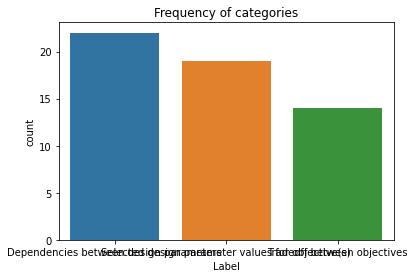

In [9]:
sns.countplot(df1['intent_2'])
plt.xlabel('Label')
plt.title('Frequency of categories')

In [ ]:
# import nltk, csv, re packages
import nltk
import csv
import re

#Download the punkt package to remove punctuations
nltk.download('punkt')

#Download the stopwors package to remove common stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import pandas as pd                        #Import pandas package as pd
import contractions                        #Import contractions package
from num2words import num2words            #Import num2words package
from nltk.tokenize import word_tokenize    #Import the word_tokenizer package
from nltk.tokenize import regexp_tokenize  #Import the regexp_tokenizer package
from nltk.stem import WordNetLemmatizer    #Import the WordNetLemmatizer package
from nltk.stem import PorterStemmer        #Impport the Porter stemmer package

In [11]:
df2 = df[['body']].astype('str')

In [12]:
df2['expan_contra']=""

for i in range(len(df2['body'])):
   df2.loc[[i],['expan_contra']] = contractions.fix(df2['body'][i])

In [15]:
def expabr(user_string):
    user_string = user_string.split(" ")
    # File path which consists of Abbreviations.
    fileName = "/content/drive/MyDrive/Colab Notebooks/Data/Engine_design/slang.txt"
    j = 0

    for _str in user_string:
      # File Access mode [Read Mode]
      accessMode = "r"
      with open(fileName, accessMode) as myCSVfile:
      # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
          dataFromFile = csv.reader(myCSVfile, delimiter="=")
          for row in dataFromFile:
# Check if selected word matches short forms[LHS] in text file.
            if _str.upper() == row[0]:  
              user_string[j] = row[1]   
          myCSVfile.close()
      j = j + 1
    # Replacing commas with spaces for final output.
    return ' '.join(user_string)

In [18]:
df2['body_abbr']=""
for i in range(len(df2['body_abbr'])): 
  df2['body_abbr'][i] = expabr(df2['expan_contra'][i])

In [19]:
def expsym(user_string):
    user_string = re.sub(";", " ; ", user_string)
    user_string = re.sub("\\?", " question mark ", user_string)
    user_string = re.sub("=", " equals to ", user_string)
    user_string = re.sub(":", " : ", user_string)
    user_string = re.sub(">", " greater than ", user_string)
    user_string = re.sub("<", " lesser than ", user_string)
    user_string = re.sub("_", " _ ", user_string)
    user_string = re.sub("[^0-9a-zA-Z=\s:;?_-]+", "",user_string)
    user_string = ' '.join(re.split('(\d+)', user_string))
    user_string = user_string.split(" ")
    # File path which consists of Abbreviations.
    fileName = "/content/drive/MyDrive/Colab Notebooks/Data/Engine_design/symbols.txt"
    j = 0

    for _str in user_string:
      # File Access mode [Read Mode]
      accessMode = "r"
      with open(fileName, accessMode) as myCSVfile:
      # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
          dataFromFile = csv.reader(myCSVfile, delimiter="=")
          for row in dataFromFile:
# Check if selected word matches short forms[LHS] in text file.
            if _str == row[0]:  
              user_string[j] = row[1]   
          myCSVfile.close()
      j = j + 1
    # Replacing commas with spaces for final output.
    return ' '.join(user_string)

In [22]:
df2['body_syexp']=" "
for i in range(len(df2['body'])):
  df2['body_syexp'][i] = expsym(df2['body_abbr'][i])

In [ ]:
df2.head()

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def wordtok(user_string):
  tokenized_word=word_tokenize(user_string)
  return tokenized_word

In [ ]:
df2['word_token']=" "
for i in range(len(df2['body_syexp'])):
 df2['word_token'][i] = wordtok(df2['body_syexp'][i])

In [24]:
df3 = df2[['body_syexp']]

In [25]:
ndf = pd.concat([df, df3], axis=1)

In [26]:
ndf = ndf.drop_duplicates(keep=False, inplace=False)

In [28]:
ndf.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/Engine_design/Data_Aug/m2_prep.csv', index=False)

Augumentation through data translation

In [ ]:
#Installing the nlpaug package
!pip install nlpaug==0.0.14

In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [1]:
nldf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Engine_design/Data_Aug/m2s1_aug.csv").astype('str')

NameError: ignored

In [ ]:
nldf.head()

In [ ]:
def key_aug(text):
  aug = nac.KeyboardAug()
  augmented_text = aug.augment(text, n=1)
  return augmented_text



In [ ]:
nldf['keyaug1']= ""
nldf['keyaug1'] = nldf['body'].apply(lambda text: key_aug(text))
nldf['keyaug1'].head()

In [ ]:
nldf['keyaug2']= ""
nldf['keyaug2'] = nldf['body'].apply(lambda text: key_aug(text))
nldf['keyaug2'].head()

In [ ]:
def spell_aug(text):
  aug = naw.SpellingAug()
  augmented_text = aug.augment(text, n=1)
  return augmented_text

In [ ]:
nldf['spellaug1']= ""
nldf['spellaug1'] = nldf['body'].apply(lambda text: key_aug(text))
nldf['spellaug1'].head()

In [ ]:
from nltk.corpus import wordnet 

def get_synonyms(word):
    """
    Get synonyms of a word
    """
    synonyms = set()
    
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    
    if word in synonyms:
        synonyms.remove(word)
    
    return list(synonyms)


In [ ]:
def synonym_replacement(words, n):
    
    words = words.split()
    
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        
        if num_replaced >= n: #only replace up to n words
            break

    sentence = ' '.join(new_words)
    return sentence

In [72]:
import random 

In [73]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nldf['syn_rep']=""
for i in range(len(nldf['body'])):
  nldf['syn_rep'][i] = synonym_replacement(nldf['body'][i],2)

In [ ]:
nldf.head()

In [ ]:
nldf.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/Engine_design/Data_Aug/M2inital.csv', index=False)